In [8]:
import pandas as pd
import datetime as dt
import numpy as np

import pylab as pl
import seaborn as sns

from Crypto.Cipher import Blowfish
import hashlib

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [9]:
IN_PATH = '/Users/anokhin/Desktop/39154.csv'
OUT_PATH = '/Users/anokhin/Desktop/regru.la.jss'

In [10]:
ts_parser = lambda ts: dt.datetime.strptime(ts, "%Y-%m-%d")
df1 = pd.read_csv(
    IN_PATH, sep=",", 
    header=None, names=['email', 'phone', 'retro_dt'],
    converters={'retro_dt': ts_parser}    
)
print df1["retro_dt"].min(), df1["retro_dt"].max()
df1.head()

2016-01-05 00:00:00 2016-04-05 00:00:00


,email,phone,retro_dt
0,ostrovskiysv@gmail.com,NaN,2016-01-10
1,vladimir@53040.ru,+7 922 4529354,2016-01-12
2,mail.gomel@mail.ru,+375291711308,2016-01-16
3,denusa1987@mail.ru,+7 9628473656,2016-01-20
4,gsrtsn@mail.ru,+7 9635992898,2016-01-20


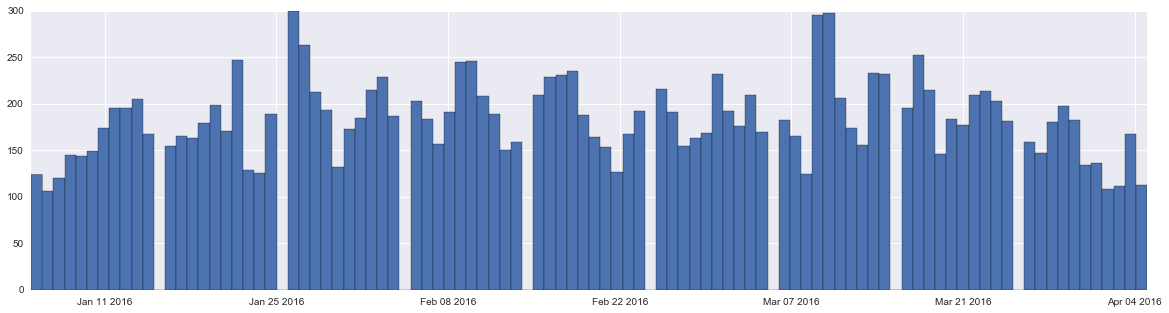

In [11]:
pl.figure(figsize=(20, 5))
df1['retro_dt'].hist(bins=100)
pl.show()

In [14]:
class Encryptor:
    def __init__(self, key):
        self.bf = Blowfish.new(key.strip().decode('base64'), Blowfish.MODE_ECB)

    def encode(self, email):
        padding = ''
        if (len(email) % 8  ) != 0:
            padding = ' ' * (8-(len(email) % 8))
        return '%s' % self.bf.encrypt(email.lower() + padding).encode('base64').replace("\n","")

    def decode(self, email):
        content = email.split(':')[1].strip('{}')
        res = self.bf.decrypt((content + "\n").decode('base64'))
        return res.strip()

In [16]:
e = Encryptor('')
df1["email_enc"] = df1["email"].map(lambda m: e.encode(m))
df1.head()

,email,phone,retro_dt,email_enc
0,ostrovskiysv@gmail.com,NaN,2016-01-10,OI7sOsgNe1/zQ2NzQ7nLfYwMuBMORmwH
1,vladimir@53040.ru,+7 922 4529354,2016-01-12,KO6AFBiXahgnTidhlWhZiOTVEQ6hCvVL
2,mail.gomel@mail.ru,+375291711308,2016-01-16,DgRYbYpkNNtOJHM4WI7VdYFZ5jAGYw5E
3,denusa1987@mail.ru,+7 9628473656,2016-01-20,/6kQ4tUn0Yk+si5bUEGoloFZ5jAGYw5E
4,gsrtsn@mail.ru,+7 9635992898,2016-01-20,aImrc1FJLuWEHMkYfWzCSg==


In [17]:
USER_PATTERN = '{"vid":"%s","okid":%s,"email":%s,"vkid":%s,"category":{"int":%d},"end":{"long":%d}}'
STRING_PATTERN = '{"string":"%s"}'
MONTH_SECONDS = 31 * 24 * 60 * 60

In [18]:
with open(OUT_PATH, "w") as out_file:
    for i, row in df1.iterrows():
        end_ts = int(row["retro_dt"].strftime("%s")) 
        
        em = STRING_PATTERN % row["email_enc"]
        print >> out_file, USER_PATTERN % ("", "null", em, "null", 1, end_ts)

In [19]:
%%bash
head /Users/anokhin/Desktop/regru.la.jss

{"vid":"","okid":null,"email":{"string":"OI7sOsgNe1/zQ2NzQ7nLfYwMuBMORmwH"},"vkid":null,"category":{"int":1},"end":{"long":1452373200}}
{"vid":"","okid":null,"email":{"string":"KO6AFBiXahgnTidhlWhZiOTVEQ6hCvVL"},"vkid":null,"category":{"int":1},"end":{"long":1452546000}}
{"vid":"","okid":null,"email":{"string":"DgRYbYpkNNtOJHM4WI7VdYFZ5jAGYw5E"},"vkid":null,"category":{"int":1},"end":{"long":1452891600}}
{"vid":"","okid":null,"email":{"string":"/6kQ4tUn0Yk+si5bUEGoloFZ5jAGYw5E"},"vkid":null,"category":{"int":1},"end":{"long":1453237200}}
{"vid":"","okid":null,"email":{"string":"aImrc1FJLuWEHMkYfWzCSg=="},"vkid":null,"category":{"int":1},"end":{"long":1453237200}}
{"vid":"","okid":null,"email":{"string":"DSyw/CtOLKgFWho2BerbZYaYOebnNdbd"},"vkid":null,"category":{"int":1},"end":{"long":1453582800}}
{"vid":"","okid":null,"email":{"string":"Hi7gBGQwacL9VeyB3KrVLSKfknMq4ZAo"},"vkid":null,"category":{"int":1},"end":{"long":1453669200}}
{"vid":"","okid":null,"email":{"string":"kptRG5zeKY6Zyhe

In [21]:
e.decode('{email:OI7sOsgNe1/zQ2NzQ7nLfYwMuBMORmwH}')

'ostrovskiysv@gmail.com'